In [ ]:
!git config --global user.email 'obandomarcos96@gmail.com'
!git config --global user.password 'Quovadis96'

In [ ]:
!git rm Tests/InitialTest_DeepOPT.ipynb;git add Tests/MoDL_training_test.ipynb savedModels/

rm 'Tests/InitialTest_DeepOPT.ipynb'


In [ ]:
!git commit -m 'Testing training Model for MRI';git push origin main

[main d2c6a2f] Testing training Model for MRI
 47 files changed, 22 insertions(+), 1 deletion(-)
 delete mode 100644 Tests/InitialTest_DeepOPT.ipynb
 create mode 100644 Tests/MoDL_training_test.ipynb
 create mode 100644 savedModels/11May_0541pm_5L_1K_50E_AG/checkpointTst
 create mode 100644 savedModels/11May_0541pm_5L_1K_50E_AG/modelTst.data-00000-of-00001
 create mode 100644 savedModels/11May_0541pm_5L_1K_50E_AG/modelTst.index
 create mode 100644 savedModels/11May_0541pm_5L_1K_50E_AG/modelTst.meta
 create mode 100644 savedModels/11May_0611pm_5L_1K_50E_AG/checkpointTst
 create mode 100644 savedModels/11May_0611pm_5L_1K_50E_AG/modelTst.data-00000-of-00001
 create mode 100644 savedModels/11May_0611pm_5L_1K_50E_AG/modelTst.index
 create mode 100644 savedModels/11May_0611pm_5L_1K_50E_AG/modelTst.meta
 create mode 100644 savedModels/11May_0622pm_5L_1K_50E_AG/checkpointTst
 create mode 100644 savedModels/11May_0622pm_5L_1K_50E_AG/modelTst.data-00000-of-00001
 create mode 100644 savedModels/1

In [ ]:
!git commit -m 'force test commit'

[main d2ad7a0] force test commit


In [2]:
!git pull

remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 26 (delta 5), reused 26 (delta 5), pack-reused 0
Unpacking objects: 100% (26/26), done.
From https://github.com/marcoso96/DeepOPT
   d2ad7a0..d59c14c  main       -> origin/main
Updating d2ad7a0..d59c14c
Checking out files: 100% (77/77), done.
Fast-forward
 .gitmodules                                        |   3 +
 {modl => OPTmodl}/model.py                         |   0
 .../savedModels/14Mar_1105pm/checkpoint            |   0
 .../savedModels/14Mar_1105pm}/checkpointTst        |   0
 ...vents.1521086760.argon-hm-p100-compute-3-34.hpc | Bin
 .../14Mar_1105pm/model-100.data-00000-of-00001     | Bin
 .../savedModels/14Mar_1105pm/model-100.index       | Bin
 .../savedModels/14Mar_1105pm/model-100.meta        | Bin
 .../14Mar_1105pm/model-50.data-00000-of-00001      | Bin
 .../savedModels/14Mar_1105pm/model-50.index        | Bin
 .../savedMode

In [1]:
import os
os.chdir('/content/drive/MyDrive/Balseiro/Maestría/Implementación/DeepOPT')
# import some libraries
import os,time, sys
sys.path.append('modl/')
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'  #Avoids printing on stderr 
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
from datetime import datetime
from tqdm import tqdm
%load_ext autoreload
%autoreload 1
import matplotlib.pyplot as plt

%aimport supportingFunctions 
%aimport model
sf = supportingFunctions 
mm = model

TensorFlow 1.x selected.


In [ ]:
tf.reset_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True


In [ ]:
#--------------------------------------------------------------
#% SET THESE PARAMETERS CAREFULLY
nLayers=5
epochs=50
batchSize=1
gradientMethod='AG'
K=1
sigma=0.01
restoreWeights=False

In [ ]:
#%% to train the model with higher K values  (K>1) such as K=5 or 10,
# it is better to initialize with a pre-trained model with K=1.
if K>1:
    restoreWeights=True
    restoreFromModel='04Jun_0243pm_5L_1K_100E_AG'

if restoreWeights:
    wts=sf.getWeights('savedModels/'+restoreFromModel)

In [ ]:
#--------------------------------------------------------------------------
#%%Generate a meaningful filename to save the trainined models for testing
print ('*************************************************')
start_time=time.time()
saveDir='savedModels/'
cwd=os.getcwd()

directory=saveDir+datetime.now().strftime("%d%b_%I%M%P_")+ \
 str(nLayers)+'L_'+str(K)+'K_'+str(epochs)+'E_'+gradientMethod

if not os.path.exists(directory):
    os.makedirs(directory)
sessFileName= directory+'/model'


*************************************************


In [ ]:
#%% save test model
tf.reset_default_graph()

csmT = tf.placeholder(tf.complex64,shape=(None,12,256,232),name='csm')
maskT= tf.placeholder(tf.complex64,shape=(None,256,232),name='mask')
atbT = tf.placeholder(tf.float32,shape=(None,256,232,2),name='atb')

out=mm.makeModel(atbT,csmT,maskT,False,nLayers,K,gradientMethod)
predTst=out['dc'+str(K)]
predTst=tf.identity(predTst,name='predTst')
sessFileNameTst=directory+'/modelTst'

saver=tf.train.Saver()
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    savedFile=saver.save(sess, sessFileNameTst,latest_filename='checkpointTst')
print ('testing model saved:' +savedFile)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
testing model saved:savedModels/12May_1016pm_5L_1K_50E_AG/modelTst


In [ ]:
#%% read multi-channel dataset - Me cargué el dataset de Aggarwal para chequear funcionamiento
trnOrg,trnAtb,trnCsm,trnMask=sf.getData('training')
trnOrg,trnAtb=sf.c2r(trnOrg),sf.c2r(trnAtb)

#%%
tf.reset_default_graph()
csmP = tf.placeholder(tf.complex64,shape=(None,None,None,None),name='csm')
maskP= tf.placeholder(tf.complex64,shape=(None,None,None),name='mask')
atbP = tf.placeholder(tf.float32,shape=(None,None,None,2),name='atb')
orgP = tf.placeholder(tf.float32,shape=(None,None,None,2),name='org')


Reading the data. Please wait...


modl/supportingFunctions.py:86: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5.File(filename) as f:


Elapsed time: 56.325071 seconds.

Successfully read the data from file!
Now doing undersampling....
Elapsed time: 30.190242 seconds.

Successfully undersampled data!


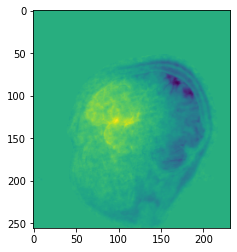

In [ ]:
# Checking dataset
trnAtb.shape

plt.imshow(trnAtb[100,:,:,0])

In [ ]:
#%% creating the dataset
nTrn=trnOrg.shape[0]                              # Number of training examples, batch size 
nBatch= int(np.floor(np.float32(nTrn)/batchSize)) # Number of batchs - set to 1
nSteps= nBatch*epochs                             # Steps for whole epoch

trnData = tf.data.Dataset.from_tensor_slices((orgP,atbP,csmP,maskP))    # This might be helpful for OPT dataset
trnData = trnData.cache()                                               # Puts data in cache avoiding file opening and reading, hdf5 only knows how it stores data
trnData=trnData.repeat(count=epochs)                                    # Repeats epochs times the data (50 times in this case) (yields so RAM doesn't die)
trnData = trnData.shuffle(buffer_size=trnOrg.shape[0])                  # Shuffles data with size nTrn
trnData=trnData.batch(batchSize)                                        # Combines consecutive elements of this dataset into batches             
trnData=trnData.prefetch(5)                                             # Dataset that prefetches elements from this dataset        
iterator=trnData.make_initializable_iterator()                         # deprecated, use for ... in dataset to grab elements
orgT,atbT,csmT,maskT = iterator.get_next('getNext')                       

In [ ]:
#%% make training model

out=mm.makeModel(atbT,csmT,maskT,True,nLayers,K,gradientMethod)                 # Makes model 
predT=out['dc'+str(K)]                                                          # Prediction with their sample
predT=tf.identity(predT,name='pred')                                            # Tensorize identity
loss = tf.reduce_mean(tf.reduce_sum(tf.pow(predT-orgT, 2),axis=0))              # Cost function chosen
tf.summary.scalar('loss', loss)                                                 # Gets loss as output from network training
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)                         # Returns a list of values in the collection with the given name //UPDATE_OPS is a collection of ops (operations performed when the graph runs, like multiplication, ReLU, etc.), not variables. 
                                                                                # tf.GraphKeys.UPDATE_OPS: Specifically, this collection maintains a list of ops which need 
                                                                                # to run before each training step.
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer()                                        # Optimizer Adam  
    gvs = optimizer.compute_gradients(loss)                                     # compute gradients for TRAINABLE_VARIABLES and variable
    capped_gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]  # Clips gradients in order to avoid vanisihing/exploding gradients
    opToRun=optimizer.apply_gradients(capped_gvs)                               # Apply gradients

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
#%% training code
print ('training started at', datetime.now().strftime("%d-%b-%Y %I:%M %P"))
print ('parameters are: Epochs:',epochs,' BS:',batchSize,'nSteps:',nSteps,'nSamples:',nTrn)

saver = tf.train.Saver(max_to_keep=100)
totalLoss,ep=[],0
lossT = tf.placeholder(tf.float32)      
lossSumT = tf.summary.scalar("TrnLoss", lossT)

with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    if restoreWeights:
        sess=sf.assignWts(sess,nLayers,wts)

    feedDict={orgP:trnOrg,atbP:trnAtb, maskP:trnMask,csmP:trnCsm}
    sess.run(iterator.initializer,feed_dict=feedDict)
    savedFile=saver.save(sess, sessFileName)
    print("Model meta graph saved in::%s" % savedFile)

    writer = tf.summary.FileWriter(directory, sess.graph)
    for step in tqdm(range(nSteps)):
        try:
            tmp,_,_=sess.run([loss,update_ops,opToRun])
            totalLoss.append(tmp)
            if np.remainder(step+1,nBatch)==0:
                ep=ep+1
                avgTrnLoss=np.mean(totalLoss)
                lossSum=sess.run(lossSumT,feed_dict={lossT:avgTrnLoss})
                writer.add_summary(lossSum,ep)
                totalLoss=[] #after each epoch empty the list of total loos
        except tf.errors.OutOfRangeError:
            break
    savedfile=saver.save(sess, sessFileName,global_step=ep,write_meta_graph=True)
    writer.close()

end_time = time.time()
print ('Trianing completed in minutes ', ((end_time - start_time) / 60))
print ('training completed at', datetime.now().strftime("%d-%b-%Y %I:%M %P"))
print ('*************************************************')


training started at 12-May-2021 10:18 pm
parameters are: Epochs: 50  BS: 1 nSteps: 18000 nSamples: 360
Model meta graph saved in::savedModels/12May_1016pm_5L_1K_50E_AG/model


100%|██████████| 18000/18000 [17:34<00:00, 17.07it/s]


Trianing completed in minutes  20.13189222415288
training completed at 12-May-2021 10:36 pm
*************************************************
